In [26]:
import pymysql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
!pip install imblearn
import re 

In [3]:
cleaned = pd.read_csv('cleaned.csv')

In [5]:
#1 Open the categoricals variable we created before.
categoricals = cleaned.select_dtypes(np.object)
categoricals.head()


/var/folders/tj/3p22v50d6ns8hpw1fn28jhmr0000gn/T/ipykernel_53649/161777968.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = cleaned.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03


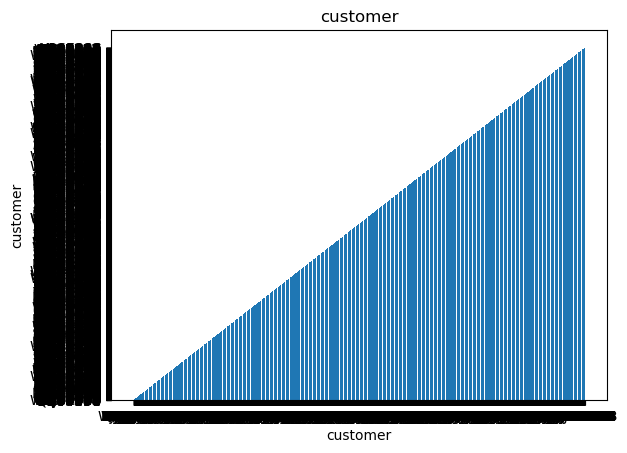

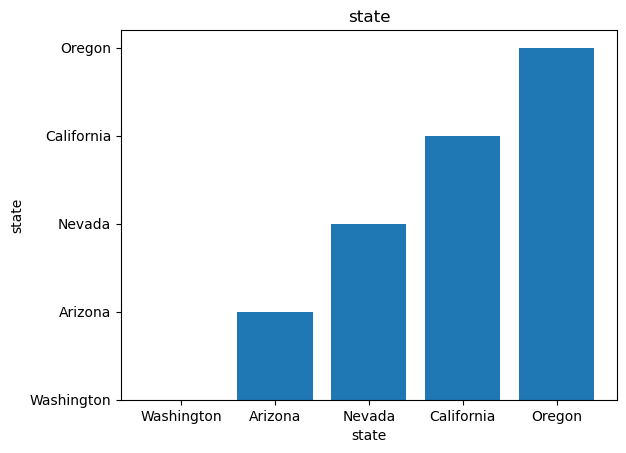

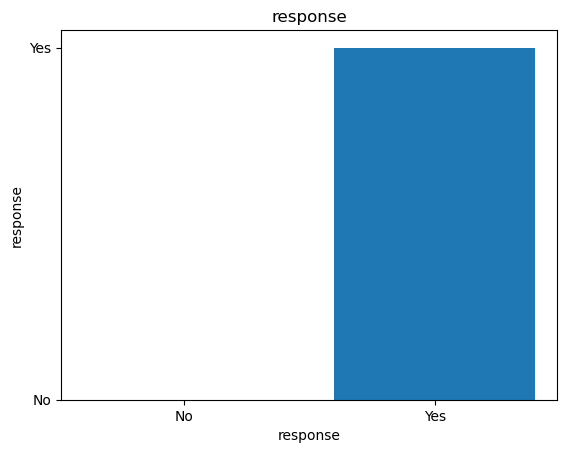

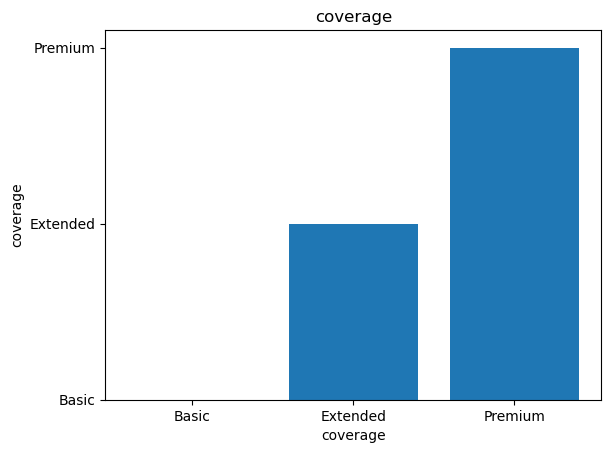

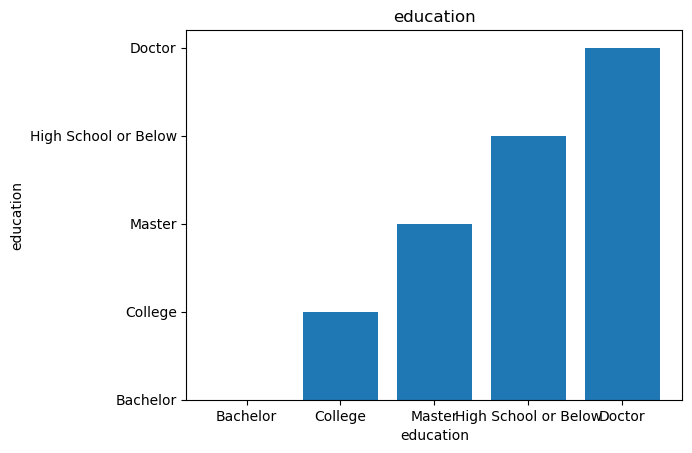

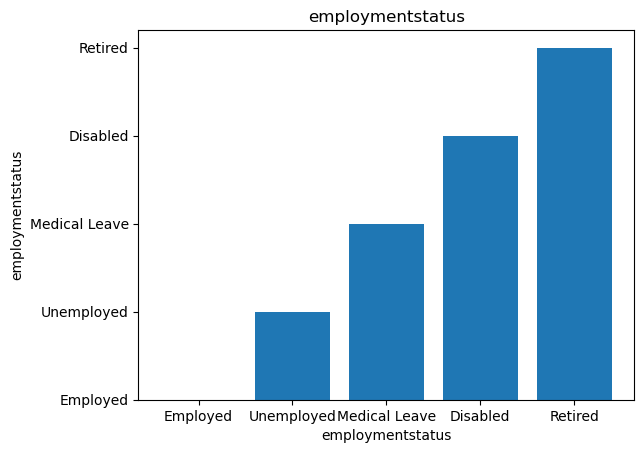

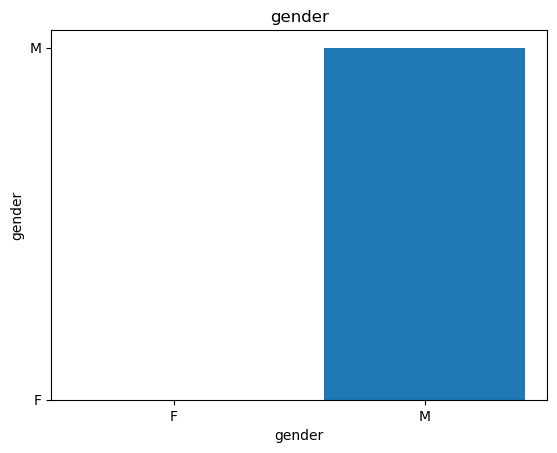

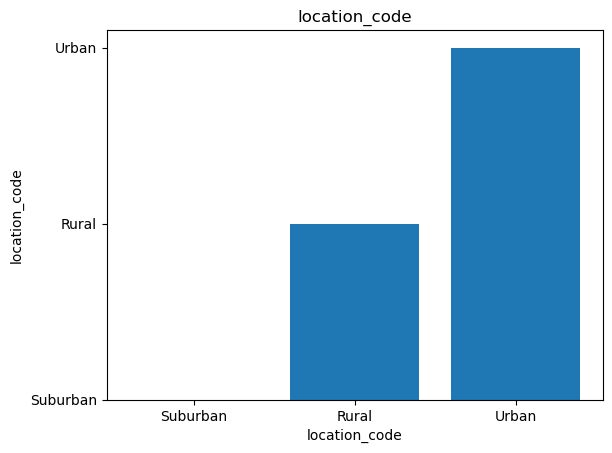

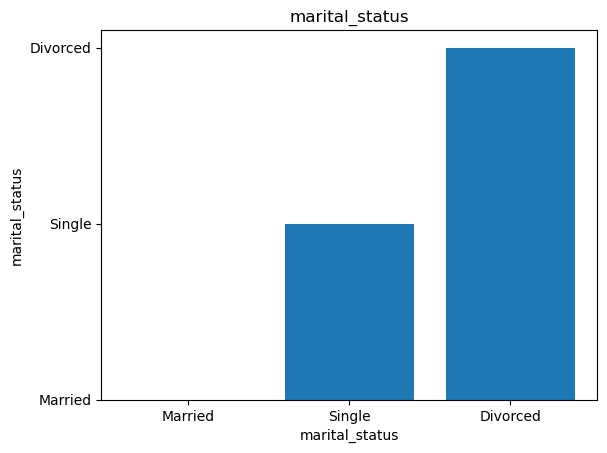

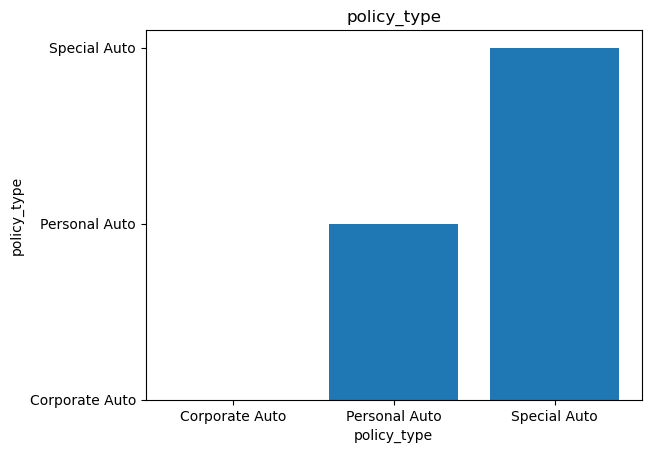

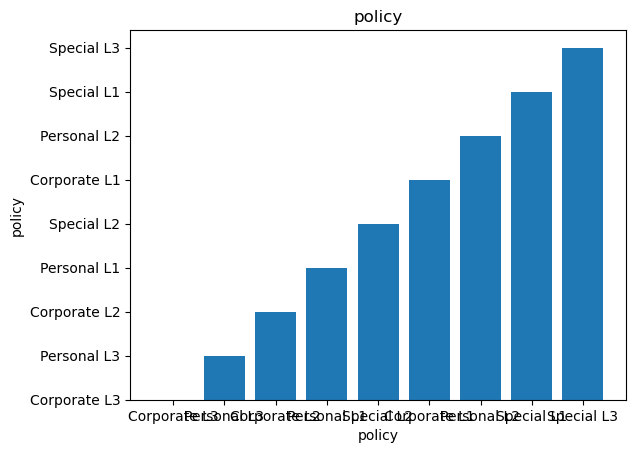

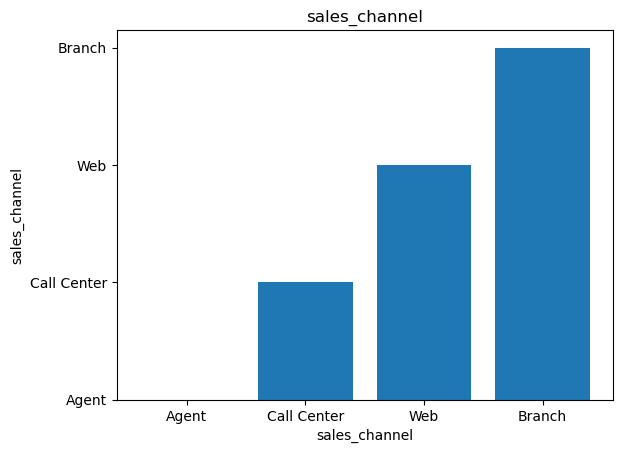

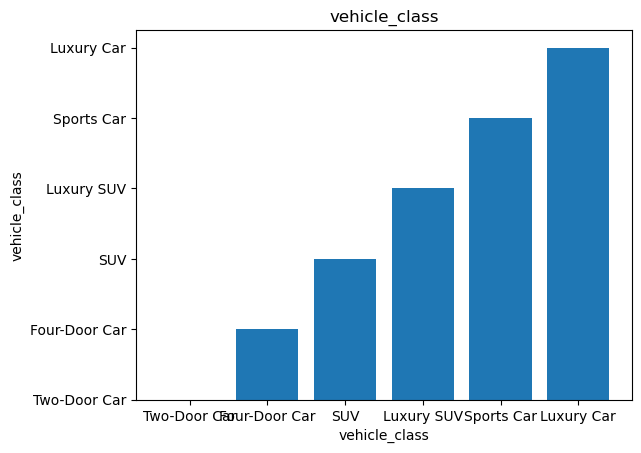

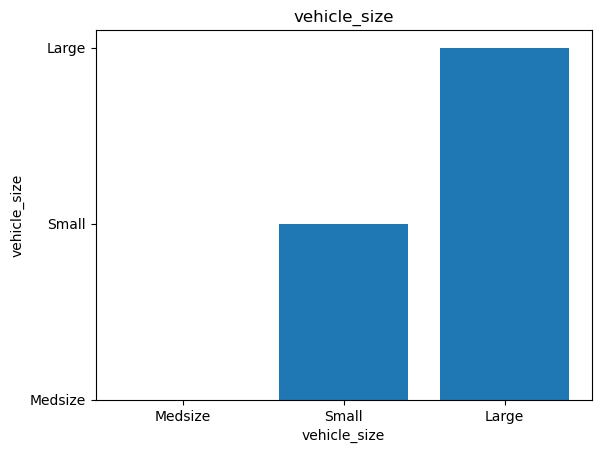

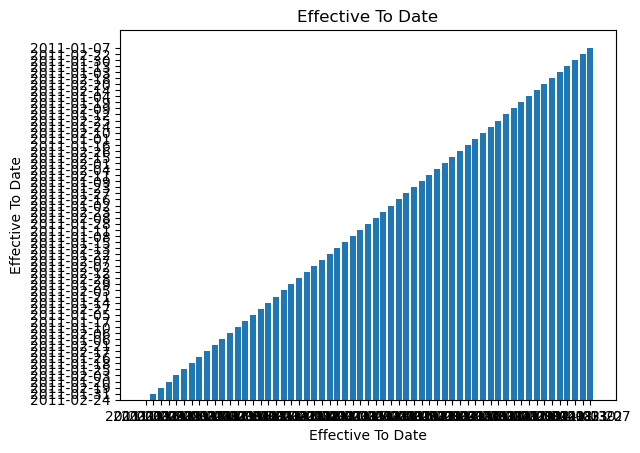

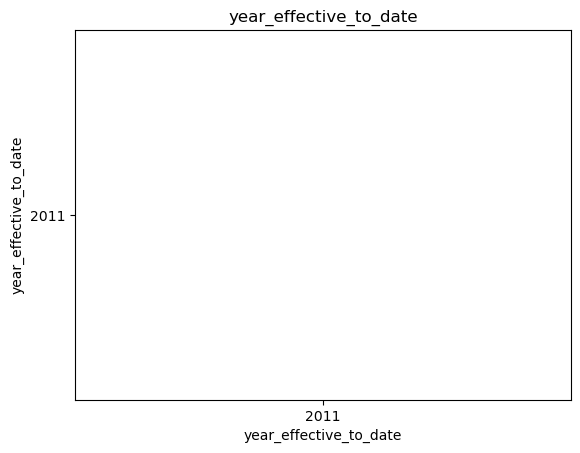

In [85]:
#2 Plot all the categorical variables with the proper plot. What can you see?

#for column in categoricals.columns:
    #plt.bar(categoricals[column],categoricals[column])
    #plt.xlabel(column)
    #plt.ylabel(column)
    #plt.title(column)
    #plt.show()
     
   


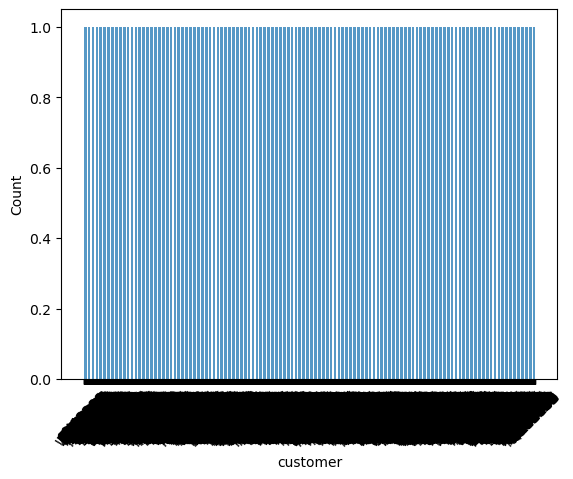

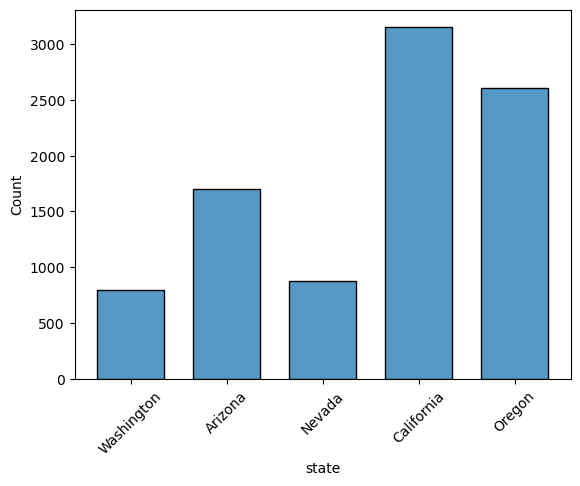

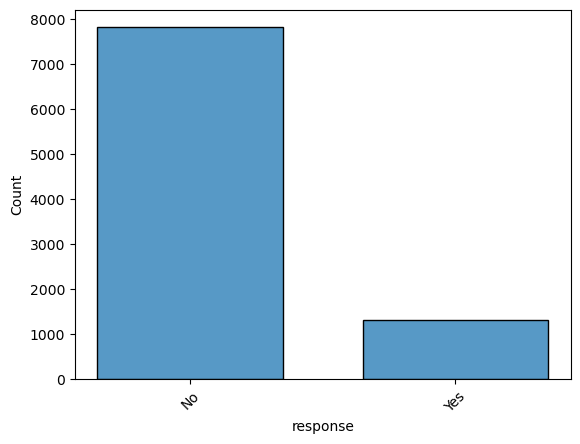

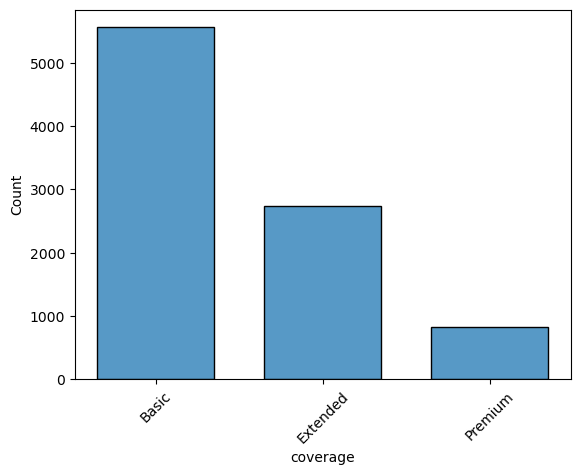

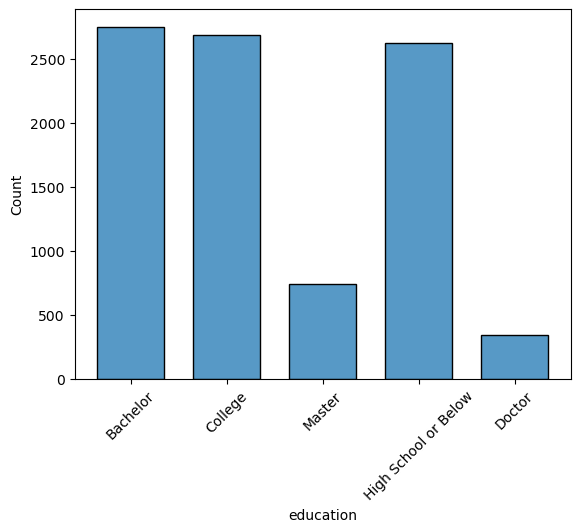

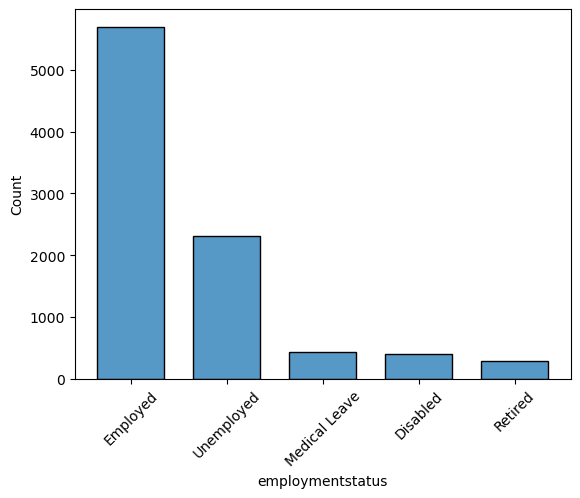

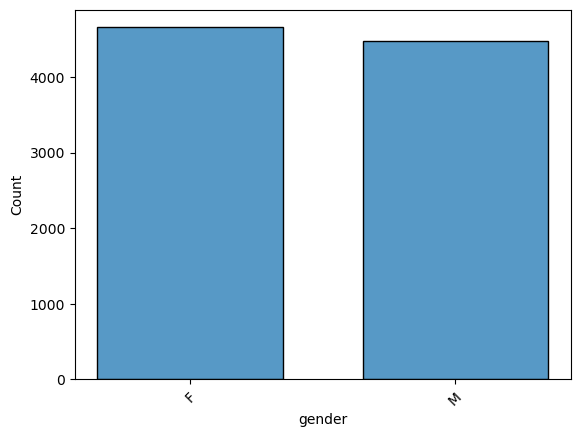

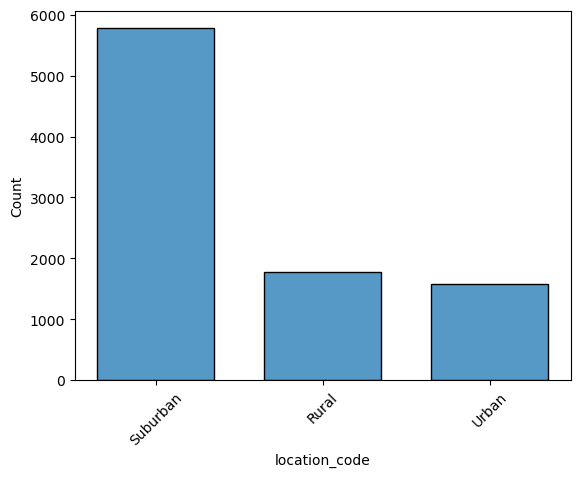

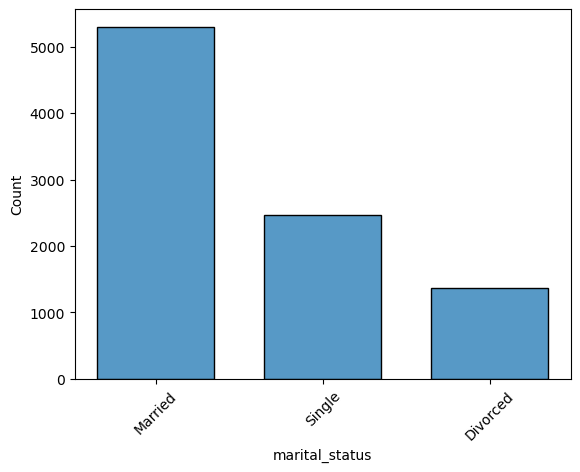

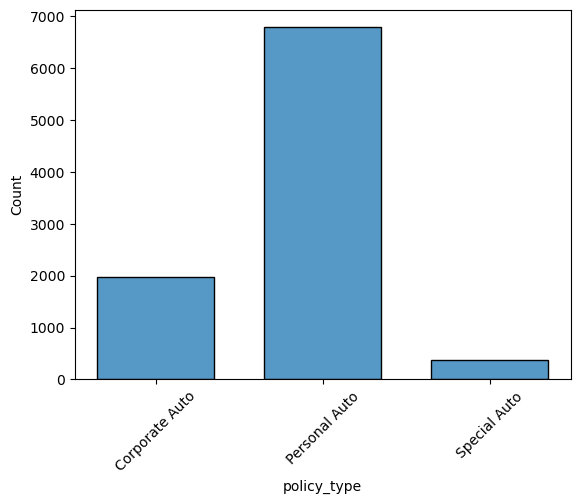

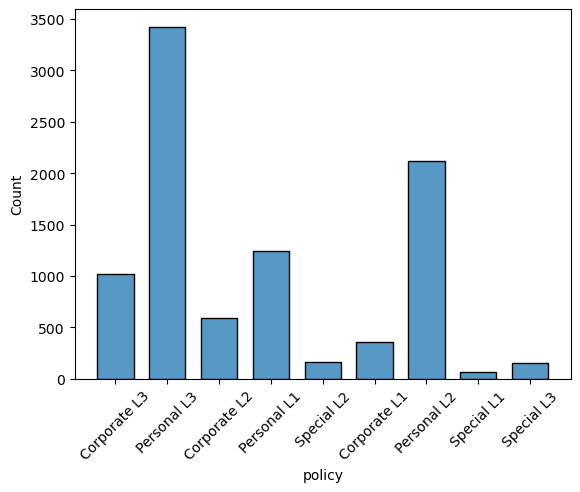

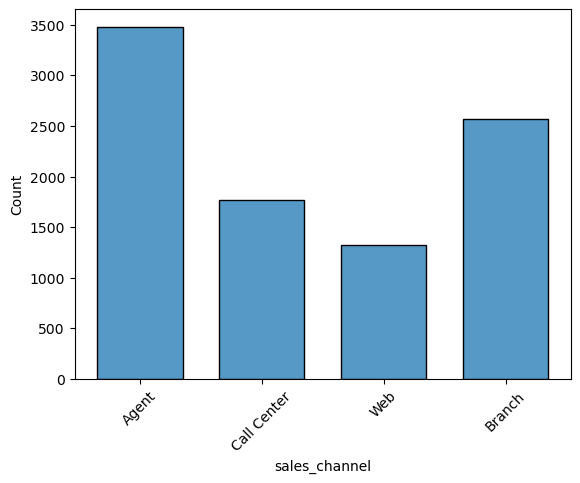

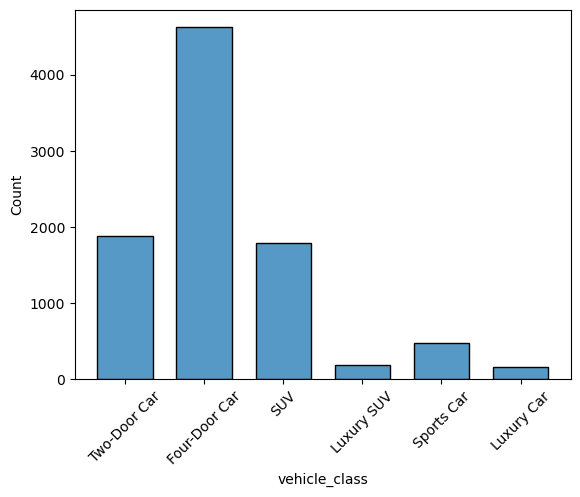

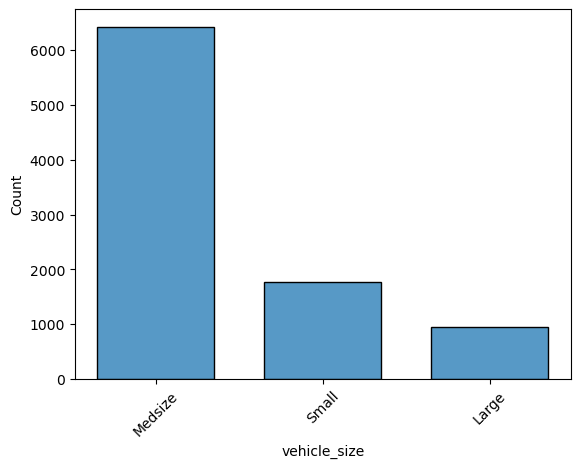

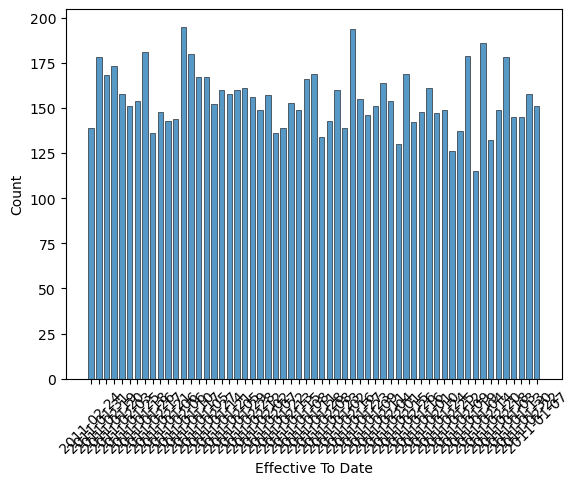

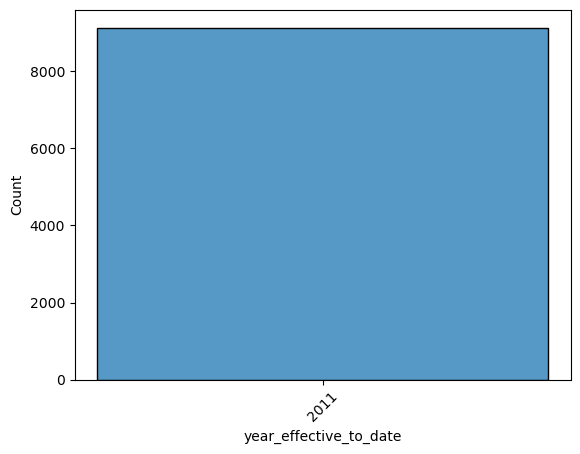

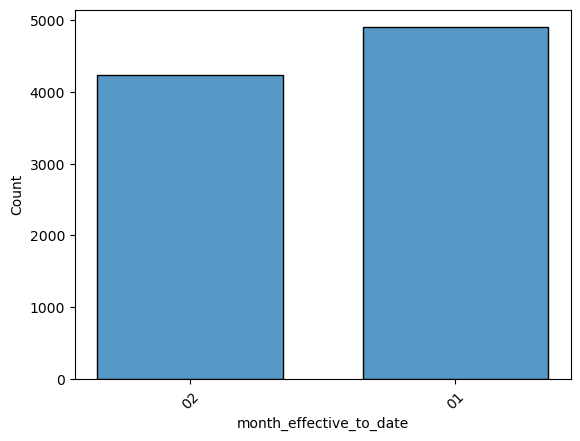

In [315]:
for column in categoricals.columns:
    sns.histplot(categoricals[column],shrink=.7)
    plt.xticks(rotation=45)
    plt.show()
     

In [55]:
#3 There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
categoricals
for column in categoricals.columns:
        print(categoricals[column].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

In [82]:
#4 Plot time variable. Can you extract something from it?


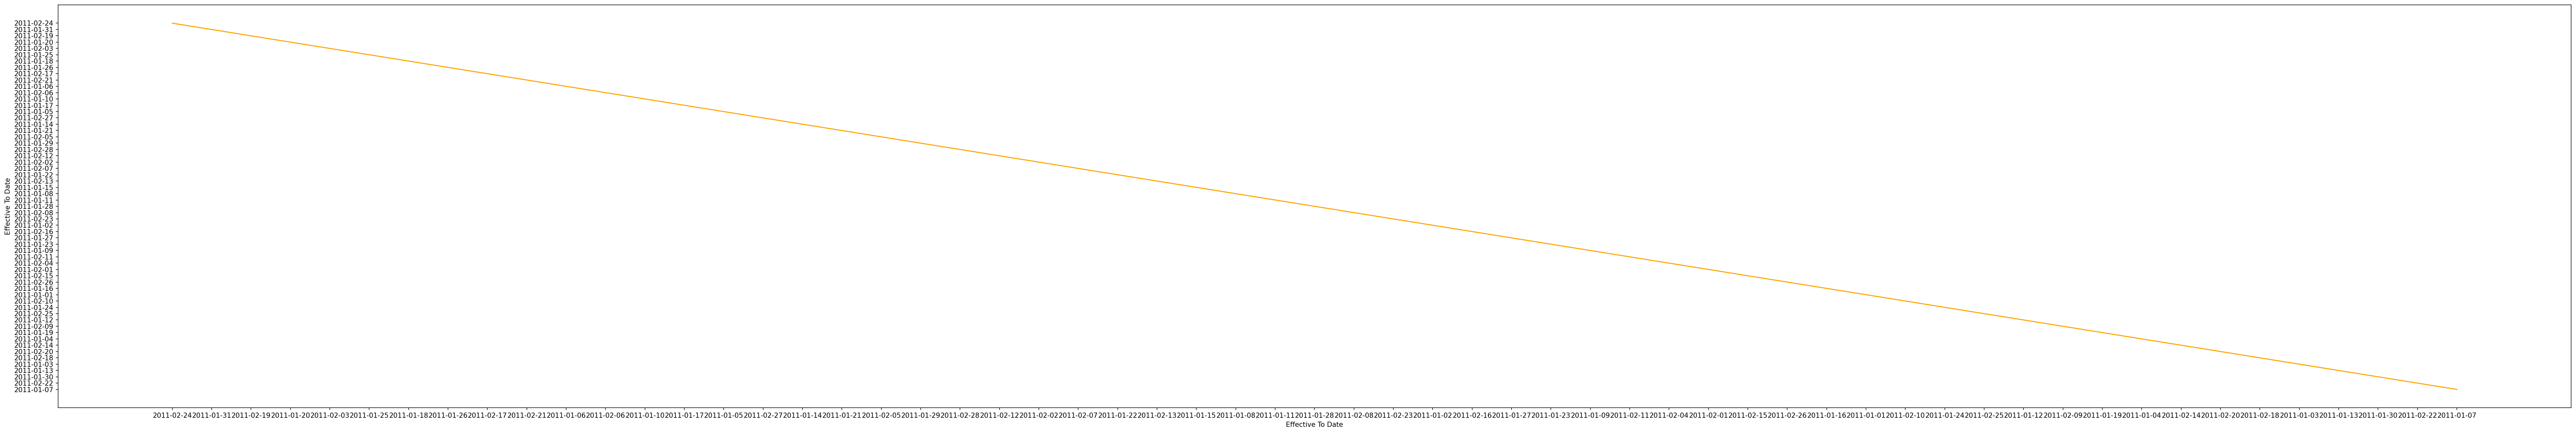

In [81]:
plt.figure(figsize=(53,9), dpi=150)
sns.lineplot(data=categoricals, x='Effective To Date', y='Effective To Date', color='orange')
plt.tight_layout()
plt.show()

In [27]:
pattern = '\d{4}'
re.findall(pattern,str(categoricals['Effective To Date']))

['2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '9129',
 '2011',
 '9130',
 '2011',
 '9131',
 '2011',
 '9132',
 '2011',
 '9133',
 '2011',
 '9134']

In [28]:
categoricals['year_effective_to_date'] = categoricals['Effective To Date'].map(lambda x:re.findall(pattern,str(x))[0])

In [30]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24,2011
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31,2011
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19,2011
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20,2011
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Web,Four-Door Car,Medsize,2011-02-10,2011
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,Medsize,2011-02-12,2011
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,Medsize,2011-02-06,2011
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car,Large,2011-02-03,2011


In [130]:
categoricals['Effective To Date'].value_counts()

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-31    178
2011-01-03    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-01-05    167
2011-02-27    167
2011-01-11    166
2011-02-04    164
2011-02-10    161
2011-02-28    161
2011-01-02    160
2011-01-21    160
2011-01-29    160
2011-02-22    158
2011-02-05    158
2011-02-03    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-02-01    154
2011-01-18    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-07    151
2011-01-25    151
2011-02-25    149
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-01-06    143
2011-02-23    143
2011-01-16    142
2011-02-16    139
2011-02-13    139
2011-02-24    139
2011-02-09    137
2011-02-17    136
2011-01-22    136
2011-02-08    134
2011-02-20

In [275]:
pattern = '\D\d{2}\D'
re.findall(pattern,str(categoricals['Effective To Date']))

['-02-',
 '-01-',
 '-02-',
 '-01-',
 '-02-',
 '-02-',
 '-02-',
 '-02-',
 '-02-',
 '-02-']

In [276]:
categoricals['month_effective_to_date'] = categoricals['Effective To Date'].map(lambda x:re.findall(pattern,str(x))[0])

In [277]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date,month_effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24,2011,-02-
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31,2011,-01-
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19,2011,-02-
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20,2011,-01-
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03,2011,-02-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Web,Four-Door Car,Medsize,2011-02-10,2011,-02-
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,Medsize,2011-02-12,2011,-02-
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,Medsize,2011-02-06,2011,-02-
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car,Large,2011-02-03,2011,-02-


In [288]:
pattern = '\d{2}'
re.findall(pattern,str(categoricals['month_effective_to_date']))

['02',
 '01',
 '02',
 '01',
 '02',
 '91',
 '29',
 '02',
 '91',
 '30',
 '02',
 '91',
 '31',
 '02',
 '91',
 '32',
 '02',
 '91',
 '33',
 '02',
 '91',
 '34']

In [289]:
categoricals['month_effective_to_date'] = categoricals['month_effective_to_date'].map(lambda x:re.findall(pattern,str(x))[0])

In [290]:
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,sales_channel,vehicle_class,vehicle_size,Effective To Date,year_effective_to_date,month_effective_to_date
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Agent,Two-Door Car,Medsize,2011-02-24,2011,02
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Agent,Four-Door Car,Medsize,2011-01-31,2011,01
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Agent,Two-Door Car,Medsize,2011-02-19,2011,02
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Call Center,SUV,Medsize,2011-01-20,2011,01
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Agent,Four-Door Car,Medsize,2011-02-03,2011,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Web,Four-Door Car,Medsize,2011-02-10,2011,02
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Branch,Four-Door Car,Medsize,2011-02-12,2011,02
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Branch,Four-Door Car,Medsize,2011-02-06,2011,02
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car,Large,2011-02-03,2011,02
